In [0]:
import math
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable

In [0]:
#VALORES DIGITADOS NO EIXO 1 PLANO XY

Digite o comprimento da barra: 1.420
digite a posição do apoio 1: 0.325
digite a posição do apoio 2: 1.420
digite o número de forcas existentes: 0
digite o número de cargas distribuídas: 2
digite o número de momentos existentes: 1
Digite o valor da carga distribuída 1: 2735
Digite a posição inicial da carga distribuída 1: 0
Digite a posição final da carga distribuída 1: 0.2
Digite o valor da carga distribuída 2: -10936
Digite a posição inicial da carga distribuída 2: 1.020
Digite a posição final da carga distribuída 2: 1.260
Digite o modulo do momento 1: 119.65
Digite a posição do momento 1: 1.140
Rb =  -2175.165844748859
Ra =  97.52584474885907


Digite o comprimento da barra: 1.420
digite a posição do apoio 1: 0.325
digite a posição do apoio 2: 1.420
digite o número de forças existentes: 0
digite o número de cargas distribuídas: 2
digite o número de momentos existentes: 1
Digite o valor da carga distribuída 1: 2735
Digite a posição inicial da carga distribuída 1: 0
Digite a posição final da carga distribuída 1: 0.2
Digite o valor da carga distribuída 2: -10936
Digite a posição inicial da carga distribuída 2: 1.020
Digite a posição final da carga distribuída 2: 1.260
Digite o modulo do momento 1: 119.65
Digite a posição do momento 1: 1.140
Rb =  -2175.165844748859
Ra =  97.52584474885907


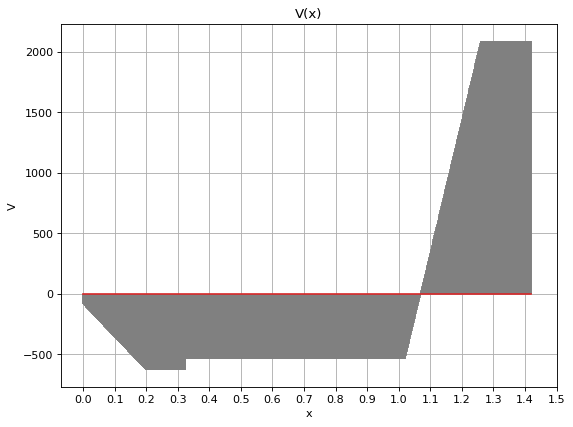

O valor máximo do esforço cortante é: 2090


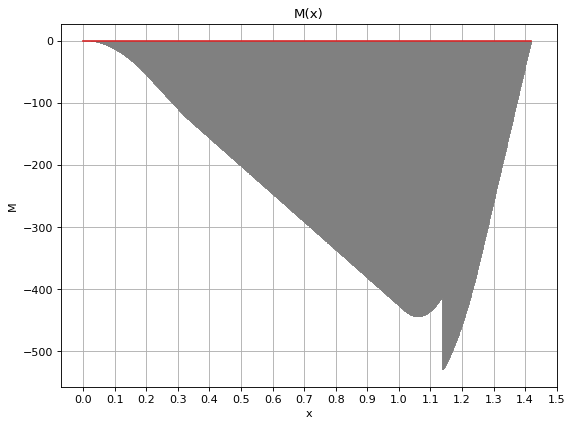

O valor momento fletor máximo é:  530


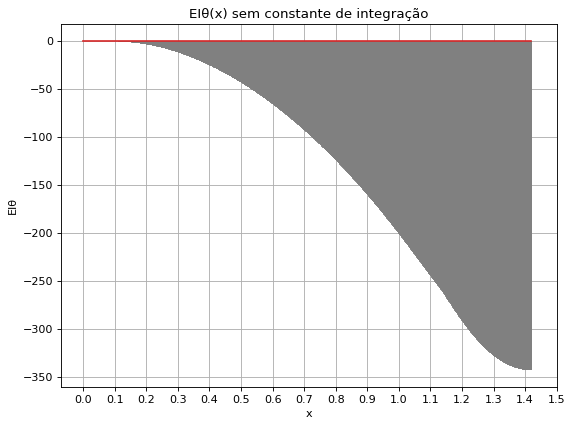

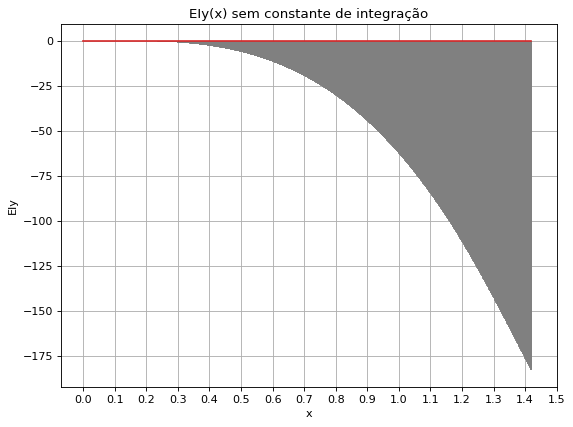

In [0]:
#@title Plano xy
soma_m = 0
soma_f = 0 
L = input("Digite o comprimento da barra: ")

p_apoio = []
for i in range(2):
  #print("digite o valor do apoio "+str(i+1))
  p_apoio.append(input("digite a posição do apoio "+str(i+1)+": "))
F_num = int(input("digite o número de forças existentes: "))
Fdis_num = int(input("digite o número de cargas distribuídas: "))
M_num = int(input("digite o número de momentos existentes: "))

soma = F_num+Fdis_num+M_num

F_modu = []
F_pos = []
for i in range(F_num):
   F_modu.append(float(input("digite o módulo da força "+str(i+1)+": ")))
   F_pos.append(float(input("digite a posição da força "+str(i+1)+": ")))
                
Fdis = []
Fdis_ini = []
Fdis_fi = []
for i in range(Fdis_num):
   Fdis.append(input("Digite o valor da carga distribuída "+str(i+1)+": "))
   Fdis_ini.append(input("Digite a posição inicial da carga distribuída "+str(i+1)+": "))
   Fdis_fi.append(input("Digite a posição final da carga distribuída "+str(i+1)+": "))

M_modu = []
M_posi = []
               
for i in range(M_num):
   M_modu.append(input("Digite o modulo do momento "+str(i+1)+": "))
   M_posi.append(input("Digite a posição do momento "+str(i+1)+": "))

for i in range(len(F_modu)):
   va1 = float(F_pos[i])-float(p_apoio[0])
   valor1 = abs(float(F_modu[i])*(va1))
   
   if(va1>=0) and(F_modu[i]>=0):
      soma_m = soma_m + valor1

   if(va1>=0) and(F_modu[i]<0):
      soma_m = soma_m - valor1

   if(va1<0) and (F_modu[i]>=0):
      soma_m = soma_m - valor1

   if(va1<0) and (F_modu[i]<0):
      soma_m = soma_m + valor1
 


for i in range(len(Fdis)):
   Fdis_mod = float(Fdis[i])*(float(Fdis_fi[i])-float(Fdis_ini[i]))
   l_med = (float(Fdis_fi[i])+float(Fdis_ini[i]))/float(2)
   va2 = float(l_med)-float(p_apoio[0])
   valor2 = abs(float(Fdis_mod)*va2)
   
   if(va2>=0) and(Fdis_mod>=0):
      soma_m = soma_m + valor2

   if(va2>=0) and(Fdis_mod<0):
      soma_m = soma_m - valor2

   if(va2<0) and (Fdis_mod>=0):
      soma_m = soma_m - valor2

   if(va2<0) and (Fdis_mod<0):
      soma_m = soma_m + valor2
   
for i in range(len(M_modu)):
   soma_m = float(soma_m) - float(M_modu[i])
                       
     
Rb1 = soma_m/(float(p_apoio[1])-float(p_apoio[0]))
print('Rb = ' ,Rb1)

for i in range(len(F_modu)):
  soma_f = float(soma_f)+float(F_modu[i])



for i in range(len(Fdis)):
  valor3 = float(Fdis[i])*(float(Fdis_fi[i])-float(Fdis_ini[i]))
  soma_f = soma_f+valor3         
              
Ra1 = soma_f-Rb1
print('Ra = ',Ra1)


F_apoio = []
F_apoio.append(float(Ra1))
F_apoio.append(float(Rb1))

L_mm = np.arange(0, float(L)+0.001, 0.001)
L_cm = []
for i in range(len(L_mm)):
  L_cm.append(round(L_mm[i], 3))


#L_mm = np.arange(0, float(L)+0.001, 0.001)

soma1 = np.zeros((len(L_cm),1))


for l in range(F_num):
  for k in range(len(L_cm)):
    if(L_cm[k]>=float(F_pos[l])):
      if(float(F_pos[l])==L_cm[k]):
        soma1[k] = soma1[k]+-float(F_modu[l])*(L_cm[k]+0.0000001-float(F_pos[l]))**0
      else:
        soma1[k] = soma1[k]+-float(F_modu[l])*(L_cm[k]-float(F_pos[l]))**0
    else:
      soma1[k] = soma1[k]+0

for u in range(Fdis_num):
  for t in range(len(L_cm)):
    if(Fdis_fi[u]!=10):
      if(L_cm[t]>=float(Fdis_fi[u])):
        soma1[t] = soma1[t]+float(Fdis[u])*(L_cm[t]-float(Fdis_fi[u]))
    
    if(L_cm[t]>=float(Fdis_ini[u])):
      soma1[t] = soma1[t]+-float(Fdis[u])*(L_cm[t]-float(Fdis_ini[u]))

    else:
      soma1[t] = soma1[t]+0

for l in range(len(p_apoio)):
  for k in range(len(L_cm)):
    if(L_cm[k]>=float(p_apoio[l])):
      if(float(p_apoio[l])==L_cm[k]):
        soma1[k] = soma1[k]+float(F_apoio[l])*(L_cm[k]+0.0000001-float(p_apoio[l]))**0
        
      else:
        soma1[k] = soma1[k]+float(F_apoio[l])*(L_cm[k]-float(p_apoio[l]))**0
    else:
      soma1[k] = soma1[k]+0
F_dir = 0
F_esq = 0
for l1 in range(M_num):
  F=float(M_modu[l1])/float(L)
  if(float(M_modu[l1])>=0):
    F_esq = F_esq + -abs(float(F))
    F_dir = F_dir + abs(float(F))
  else:
    F_esq = F_esq + abs(float(F))
    F_dir = F_dir +-abs(float(F))


  for k1 in range(len(L_cm)):
    if(L_cm[k1]>=float(0)):
      if(float(0)==L_cm[k1]):
        soma1[k1] = soma1[k1]+float(F_esq)*(L_cm[k1]+0.0000001-float(0))**0
      else:
        soma1[k1] = soma1[k1]+float(F_esq)*(L_cm[k1]-float(0))**0
    else:
      soma1[k1] = soma1[k1]+0
  for k2 in range(len(L_cm)):
    if(L_cm[k2]>=float(L)):
      if(float(L)==L_cm[k2]):
        soma1[k2] = soma1[k2]+float(F_dir)*(L_cm[k2]+0.0000001-float(L))**0
      else:
        soma1[k2] = soma1[k2]+float(F_dir)*(L_cm[k2]-float(L))**0
    else:
      soma1[k2] = soma1[k2]+0

plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.stem(L_cm, soma1, markerfmt=' ',linefmt='grey',use_line_collection = True)
plt.ylabel('V')
plt.axis('on')
plt.xlabel('x')
plt.grid('on')
plt.title('V(x)')
plt.xticks(np.arange(0, float(L)+0.1, 0.1))
plt.savefig('V(X)')
plt.show()

V_MAX = max(abs(soma1))

print('O valor máximo do esforço cortante é:',int(V_MAX))

somam1 = np.zeros((len(L_cm),1))
for l in range(F_num):
  for k in range(len(L_cm)):
    if(L_cm[k]>=float(F_pos[l])):
      somam1[k] = somam1[k]+-float(F_modu[l])*(L_cm[k]-float(F_pos[l]))**1
    else:
      somam1[k] = somam1[k]+0


for u in range(Fdis_num):
  for t in range(len(L_cm)):
    if(Fdis_fi[u]!=float(L)):
      if(L_cm[t]>=float(Fdis_fi[u])):
        somam1[t] = somam1[t]+(float(Fdis[u])/2)*(L_cm[t]-float(Fdis_fi[u]))**2
    
    if(L_cm[t]>=float(Fdis_ini[u])):
      somam1[t] = somam1[t]+(-float(Fdis[u])/2)*(L_cm[t]-float(Fdis_ini[u]))**2

    else:
      somam1[t] = somam1[t]+0

for l in range(len(p_apoio)):
  for k in range(len(L_cm)):
    if(L_cm[k]>=float(p_apoio[l])):
       somam1[k] = somam1[k]+float(F_apoio[l])*(L_cm[k]-float(p_apoio[l]))
    else:
      somam1[k] = somam1[k]+0

for l in range(M_num):
  for k in range(len(L_cm)):
    if(L_cm[k]>=float(M_posi[l])):
      if(float(M_posi[l])==L_cm[k]):
        somam1[k] = somam1[k]+-float(M_modu[l])*(L_cm[k]+0.0000001-float(M_posi[l]))**0
      else:
        somam1[k] = somam1[k]+-float(M_modu[l])*(L_cm[k]-float(M_posi[l]))**0
    else:
      somam1[k] = somam1[k]+0


plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.stem(L_cm, somam1, markerfmt=' ',linefmt='grey',use_line_collection = True)
plt.ylabel('M')
plt.xlabel('x')
plt.grid('on')
plt.title('M(x)')
plt.xticks(np.arange(0, float(L)+0.1, 0.1))
plt.savefig('M(x)')
plt.show()

M_MAX = max(abs(somam1))

print('O valor momento fletor máximo é: ',int(M_MAX))




somai1 = np.zeros((len(L_cm),1))
for l in range(F_num):
  for k in range(len(L_cm)):
    if(L_cm[k]>=float(F_pos[l])):
      somai1[k] = somai1[k]+(-float(F_modu[l])/2)*(L_cm[k]-float(F_pos[l]))**2
    else:
      somai1[k] = somai1[k]+0

for u in range(Fdis_num):
  for t in range(len(L_cm)):
    if(Fdis_fi[u]!=float(L)):
      if(L_cm[t]>=float(Fdis_fi[u])):
        somai1[t] = somai1[t]+(float(Fdis[u])/6)*(L_cm[t]-float(Fdis_fi[u]))**3
    
    if(L_cm[t]>=float(Fdis_ini[u])):
      somai1[t] = somai1[t]+(-float(Fdis[u])/6)*(L_cm[t]-float(Fdis_ini[u]))**3

    else:
      somai1[t] = somai1[t]+0

for l in range(len(p_apoio)):
  for k in range(len(L_cm)):
    if(L_cm[k]>=float(p_apoio[l])):
       somai1[k] = somai1[k]+(float(F_apoio[l])/2)*(L_cm[k]-float(p_apoio[l]))**2
    else:
      somai1[k] = somai1[k]+0

for l in range(M_num):
  for k in range(len(L_cm)):
    if(L_cm[k]>=float(M_posi[l])):
      somai1[k] = somai1[k]+-float(M_modu[l])*(L_cm[k]-float(M_posi[l]))**1
    else:
      somai1[k] = somai1[k]+0

plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.stem(L_cm, somai1, markerfmt=' ',linefmt='grey',use_line_collection = True)
plt.ylabel('EIθ')
plt.xlabel('x')
plt.grid('on')
plt.title('EIθ(x) sem constante de integração')
plt.xticks(np.arange(0, float(L)+0.1, 0.1))
plt.savefig('test')
plt.show()

somad1 = np.zeros((len(L_cm),1))
for l in range(F_num):
  for k in range(len(L_cm)):
    if(L_cm[k]>=float(F_pos[l])):
      somad1[k] = somad1[k]+(-float(F_modu[l])/6)*(L_cm[k]-float(F_pos[l]))**3
    else:
      somad1[k] = somad1[k]+0


for u in range(Fdis_num):
  for t in range(len(L_cm)):
    if(Fdis_fi[u]!=float(L)):
      if(L_cm[t]>=float(Fdis_fi[u])):
        somad1[t] = somad1[t]+(float(Fdis[u])/24)*(L_cm[t]-float(Fdis_fi[u]))**4
    
    if(L_cm[t]>=float(Fdis_ini[u])):
      somad1[t] = somad1[t]+(-float(Fdis[u])/24)*(L_cm[t]-float(Fdis_ini[u]))**4

    else:
      somad1[t] = somad1[t]+0

for l in range(len(p_apoio)):
  for k in range(len(L_cm)):
    if(L_cm[k]>=float(p_apoio[l])):
       somad1[k] = somad1[k]+(float(F_apoio[l])/6)*(L_cm[k]-float(p_apoio[l]))**3
    else:
      somad1[k] = somad1[k]+0

for l in range(M_num):
  for k in range(len(L_cm)):
    if(L_cm[k]>=float(M_posi[l])):
      somad1[k] = somad1[k]+(-float(M_modu[l])/2)*(L_cm[k]-float(M_posi[l]))**2
    else:
      somad1[k] = somad1[k]+0

plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.stem(L_cm, somad1, markerfmt=' ',linefmt='grey',use_line_collection = True)


plt.ylabel('EIy')
plt.xlabel('x')
plt.grid('on')
plt.title('EIy(x) sem constante de integração')
plt.xticks(np.arange(0, float(L)+0.1, 0.1))
plt.savefig('test')
plt.show()

In [0]:
#VALORES DIGITADOS NO EIXO 1 PLANO XZ

Digite o comprimento da barra: 1.420
digite a posição do apoio 1: 0.325
digite a posição do apoio 2: 1.420
digite o número de forcas existentes: 0
digite o número de cargas distribuídas: 1
digite o número de momentos existentes: 1
Digite o valor da carga distribuída 1: -16185
Digite a posição inicial da carga distribuída 1: 1.020
Digite a posição final da carga distribuída 1: 1.260
Digite o modulo do momento 1: 207.24
Digite a posição do momento 1: 1.140
Rb =  -3080.389041095891
Ra =  -804.0109589041085

Digite o comprimento da barra: 1.420
digite a posição do apoio 1: 0.325
digite a posição do apoio 2: 1.420
digite o número de forças existentes: 0
digite o número de cargas distribuídas: 1
digite o número de momentos existentes: 1
Digite o valor da carga distribuída 1: -16185
Digite a posição inicial da carga distribuída 1: 1.020
Digite a posição final da carga distribuída 1: 1.260
Digite o modulo do momento 1: 207.24
Digite a posição do momento 1: 1.140
Rb =  -3080.389041095891
Ra =  -804.0109589041085


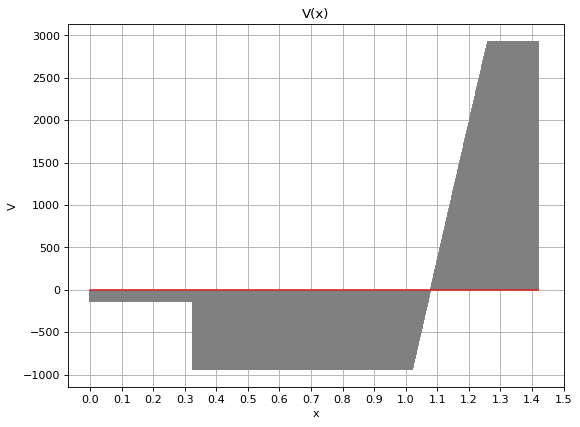

O valor máximo do esforço cortante é: 2934


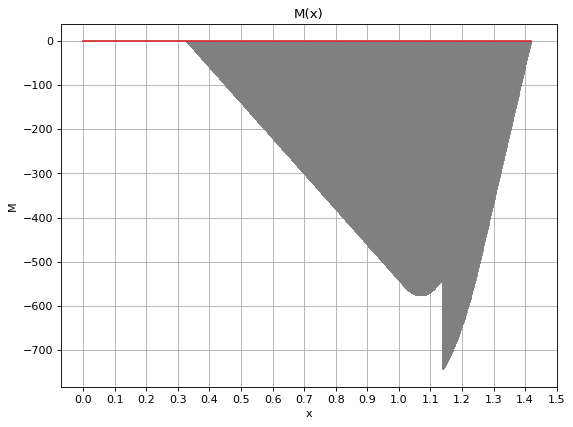

O valor momento fletor máximo é:  745


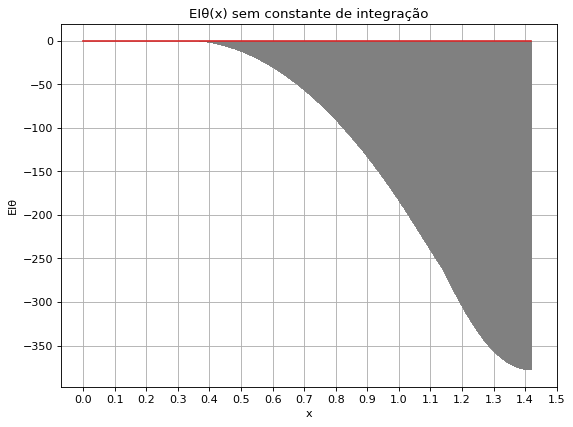

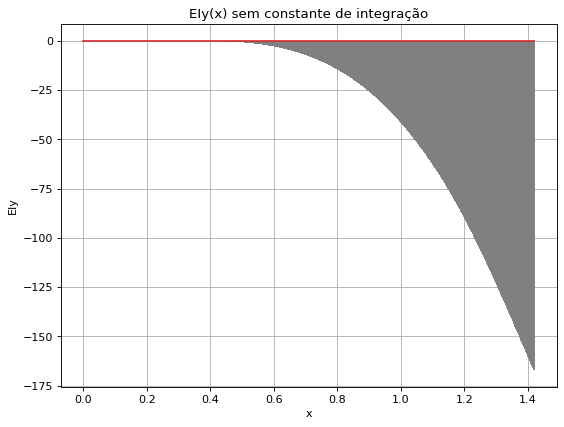

In [0]:
#@title Plano xz
soma_m = 0
soma_f = 0 
L = input("Digite o comprimento da barra: ")

p_apoio = []
for i in range(2):
  #print("digite o valor do apoio "+str(i+1))
  p_apoio.append(input("digite a posição do apoio "+str(i+1)+": "))
F_num = int(input("digite o número de forças existentes: "))
Fdis_num = int(input("digite o número de cargas distribuídas: "))
M_num = int(input("digite o número de momentos existentes: "))

soma = F_num+Fdis_num+M_num

F_modu = []
F_pos = []
for i in range(F_num):
   F_modu.append(float(input("digite o módulo da força "+str(i+1)+": ")))
   F_pos.append(float(input("digite a posição da força "+str(i+1)+": ")))
                
Fdis = []
Fdis_ini = []
Fdis_fi = []
for i in range(Fdis_num):
   Fdis.append(input("Digite o valor da carga distribuída "+str(i+1)+": "))
   Fdis_ini.append(input("Digite a posição inicial da carga distribuída "+str(i+1)+": "))
   Fdis_fi.append(input("Digite a posição final da carga distribuída "+str(i+1)+": "))

M_modu = []
M_posi = []
               
for i in range(M_num):
   M_modu.append(input("Digite o modulo do momento "+str(i+1)+": "))
   M_posi.append(input("Digite a posição do momento "+str(i+1)+": "))

for i in range(len(F_modu)):
   va1 = float(F_pos[i])-float(p_apoio[0])
   valor1 = abs(float(F_modu[i])*(va1))
   
   if(va1>=0) and(F_modu[i]>=0):
      soma_m = soma_m + valor1

   if(va1>=0) and(F_modu[i]<0):
      soma_m = soma_m - valor1

   if(va1<0) and (F_modu[i]>=0):
      soma_m = soma_m - valor1

   if(va1<0) and (F_modu[i]<0):
      soma_m = soma_m + valor1
 


for i in range(len(Fdis)):
   Fdis_mod = float(Fdis[i])*(float(Fdis_fi[i])-float(Fdis_ini[i]))
   l_med = (float(Fdis_fi[i])+float(Fdis_ini[i]))/float(2)
   va2 = float(l_med)-float(p_apoio[0])
   valor2 = abs(float(Fdis_mod)*va2)
   
   if(va2>=0) and(Fdis_mod>=0):
      soma_m = soma_m + valor2

   if(va2>=0) and(Fdis_mod<0):
      soma_m = soma_m - valor2

   if(va2<0) and (Fdis_mod>=0):
      soma_m = soma_m - valor2

   if(va2<0) and (Fdis_mod<0):
      soma_m = soma_m + valor2
   
for i in range(len(M_modu)):
   soma_m = float(soma_m) - float(M_modu[i])
                       
     
Rb = soma_m/(float(p_apoio[1])-float(p_apoio[0]))
print('Rb = ' ,Rb)

for i in range(len(F_modu)):
  soma_f = float(soma_f)+float(F_modu[i])



for i in range(len(Fdis)):
  valor3 = float(Fdis[i])*(float(Fdis_fi[i])-float(Fdis_ini[i]))
  soma_f = soma_f+valor3         
              
Ra = soma_f-Rb
print('Ra = ',Ra)


F_apoio = []
F_apoio.append(float(Ra))
F_apoio.append(float(Rb))

L_mm = np.arange(0, float(L)+0.001, 0.001)
L_cm = []
for i in range(len(L_mm)):
  L_cm.append(round(L_mm[i], 3))


#L_mm = np.arange(0, float(L)+0.001, 0.001)

soma = np.zeros((len(L_cm),1))


for l in range(F_num):
  for k in range(len(L_cm)):
    if(L_cm[k]>=float(F_pos[l])):
      if(float(F_pos[l])==L_cm[k]):
        soma[k] = soma[k]+-float(F_modu[l])*(L_cm[k]+0.0000001-float(F_pos[l]))**0
      else:
        soma[k] = soma[k]+-float(F_modu[l])*(L_cm[k]-float(F_pos[l]))**0
    else:
      soma[k] = soma[k]+0

for u in range(Fdis_num):
  for t in range(len(L_cm)):
    if(Fdis_fi[u]!=10):
      if(L_cm[t]>=float(Fdis_fi[u])):
        soma[t] = soma[t]+float(Fdis[u])*(L_cm[t]-float(Fdis_fi[u]))
    
    if(L_cm[t]>=float(Fdis_ini[u])):
      soma[t] = soma[t]+-float(Fdis[u])*(L_cm[t]-float(Fdis_ini[u]))

    else:
      soma[t] = soma[t]+0

for l in range(len(p_apoio)):
  for k in range(len(L_cm)):
    if(L_cm[k]>=float(p_apoio[l])):
      if(float(p_apoio[l])==L_cm[k]):
        soma[k] = soma[k]+float(F_apoio[l])*(L_cm[k]+0.0000001-float(p_apoio[l]))**0
        
      else:
        soma[k] = soma[k]+float(F_apoio[l])*(L_cm[k]-float(p_apoio[l]))**0
    else:
      soma[k] = soma[k]+0

F_dir = 0
F_esq = 0
for l1 in range(M_num):
  F=float(M_modu[l1])/float((L))
  if(float(M_modu[l1])>=0):
    F_esq = F_esq + -abs(F)
    F_dir = F_dir + abs(F)
  else:
    F_esq = F_esq + abs(F)
    F_dir = F_dir + -abs(F)


  for k1 in range(len(L_cm)):
    if(L_cm[k1]>=float(0)):
      if(float(0)==L_cm[k1]):
        soma[k1] = soma[k1]+float(F_esq)*(L_cm[k1]+0.0000001-float(0))**0
      else:
        soma[k1] = soma[k1]+float(F_esq)*(L_cm[k1]-float(0))**0
    else:
      soma[k1] = soma[k1]+0
  for k2 in range(len(L_cm)):
    if(L_cm[k2]>=float(L)):
      if(float(L)==L_cm[k2]):
        soma[k2] = soma[k2]+float(F_dir)*(L_cm[k2]+0.0000001-float(L))**0
      else:
        soma[k2] = soma[k2]+float(F_dir)*(L_cm[k2]-float(L))**0
    else:
      soma[k2] = soma[k2]+0

plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.stem(L_cm, soma, markerfmt=' ',linefmt='grey',use_line_collection = True)
plt.ylabel('V')
plt.axis('on')
plt.xlabel('x')
plt.grid('on')
plt.title('V(x)')
plt.xticks(np.arange(0, float(L)+0.1, 0.1))
plt.savefig('V(X)')
plt.show()

V_MAX = max(abs(soma))

print('O valor máximo do esforço cortante é:',int(V_MAX))

somam = np.zeros((len(L_cm),1))
for l in range(F_num):
  for k in range(len(L_cm)):
    if(L_cm[k]>=float(F_pos[l])):
      somam[k] = somam[k]+-float(F_modu[l])*(L_cm[k]-float(F_pos[l]))**1
    else:
      somam[k] = somam[k]+0


for u in range(Fdis_num):
  for t in range(len(L_cm)):
    if(Fdis_fi[u]!=float(L)):
      if(L_cm[t]>=float(Fdis_fi[u])):
        somam[t] = somam[t]+(float(Fdis[u])/2)*(L_cm[t]-float(Fdis_fi[u]))**2
    
    if(L_cm[t]>=float(Fdis_ini[u])):
      somam[t] = somam[t]+(-float(Fdis[u])/2)*(L_cm[t]-float(Fdis_ini[u]))**2

    else:
      somam[t] = somam[t]+0

for l in range(len(p_apoio)):
  for k in range(len(L_cm)):
    if(L_cm[k]>=float(p_apoio[l])):
       somam[k] = somam[k]+float(F_apoio[l])*(L_cm[k]-float(p_apoio[l]))
    else:
      somam[k] = somam[k]+0

for l in range(M_num):
  for k in range(len(L_cm)):
    if(L_cm[k]>=float(M_posi[l])):
      if(float(M_posi[l])==L_cm[k]):
        somam[k] = somam[k]+-float(M_modu[l])*(L_cm[k]+0.0000001-float(M_posi[l]))**0
      else:
        somam[k] = somam[k]+-float(M_modu[l])*(L_cm[k]-float(M_posi[l]))**0
    else:
      somam[k] = somam[k]+0


plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.stem(L_cm, somam, markerfmt=' ',linefmt='grey',use_line_collection = True)

plt.ylabel('M')
plt.xlabel('x')
plt.grid('on')
plt.xticks(np.arange(0, float(L)+0.1, 0.1))
plt.title('M(x)')
plt.savefig('M(x)')
plt.show()

M_MAX = max(abs(somam))

print('O valor momento fletor máximo é: ',int(M_MAX))


somai = np.zeros((len(L_cm),1))
for l in range(F_num):
  for k in range(len(L_cm)):
    if(L_cm[k]>=float(F_pos[l])):
      somai[k] = somai[k]+(-float(F_modu[l])/2)*(L_cm[k]-float(F_pos[l]))**2
    else:
      somai[k] = somai[k]+0

for u in range(Fdis_num):
  for t in range(len(L_cm)):
    if(Fdis_fi[u]!=float(L)):
      if(L_cm[t]>=float(Fdis_fi[u])):
        somai[t] = somai[t]+(float(Fdis[u])/6)*(L_cm[t]-float(Fdis_fi[u]))**3
    
    if(L_cm[t]>=float(Fdis_ini[u])):
      somai[t] = somai[t]+(-float(Fdis[u])/6)*(L_cm[t]-float(Fdis_ini[u]))**3

    else:
      somai[t] = somai[t]+0

for l in range(len(p_apoio)):
  for k in range(len(L_cm)):
    if(L_cm[k]>=float(p_apoio[l])):
       somai[k] = somai[k]+(float(F_apoio[l])/2)*(L_cm[k]-float(p_apoio[l]))**2
    else:
      somai[k] = somai[k]+0

for l in range(M_num):
  for k in range(len(L_cm)):
    if(L_cm[k]>=float(M_posi[l])):
      somai[k] = somai[k]+-float(M_modu[l])*(L_cm[k]-float(M_posi[l]))**1
    else:
      somai[k] = somai[k]+0

plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.stem(L_cm, somai, markerfmt=' ',linefmt='grey',use_line_collection = True)
plt.ylabel('EIθ')
plt.xlabel('x')
plt.grid('on')
plt.xticks(np.arange(0, float(L)+0.1, 0.1))
plt.title('EIθ(x) sem constante de integração')
plt.savefig('test')
plt.show()

somad = np.zeros((len(L_cm),1))
for l in range(F_num):
  for k in range(len(L_cm)):
    if(L_cm[k]>=float(F_pos[l])):
      somad[k] = somad[k]+(-float(F_modu[l])/6)*(L_cm[k]-float(F_pos[l]))**3
    else:
      somad[k] = somad[k]+0


for u in range(Fdis_num):
  for t in range(len(L_cm)):
    if(Fdis_fi[u]!=float(L)):
      if(L_cm[t]>=float(Fdis_fi[u])):
        somad[t] = somad[t]+(float(Fdis[u])/24)*(L_cm[t]-float(Fdis_fi[u]))**4
    
    if(L_cm[t]>=float(Fdis_ini[u])):
      somad[t] = somad[t]+(-float(Fdis[u])/24)*(L_cm[t]-float(Fdis_ini[u]))**4

    else:
      somad[t] = somad[t]+0

for l in range(len(p_apoio)):
  for k in range(len(L_cm)):
    if(L_cm[k]>=float(p_apoio[l])):
       somad[k] = somad[k]+(float(F_apoio[l])/6)*(L_cm[k]-float(p_apoio[l]))**3
    else:
      somad[k] = somad[k]+0

for l in range(M_num):
  for k in range(len(L_cm)):
    if(L_cm[k]>=float(M_posi[l])):
      somad[k] = somad[k]+(-float(M_modu[l])/2)*(L_cm[k]-float(M_posi[l]))**2
    else:
      somad[k] = somad[k]+0

plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.stem(L_cm, somad, markerfmt=' ',linefmt='grey',use_line_collection = True)
plt.ylabel('EIy')
plt.xlabel('x')
plt.grid('on')
plt.title('EIy(x) sem constante de integração')
plt.savefig('test')

plt.show()


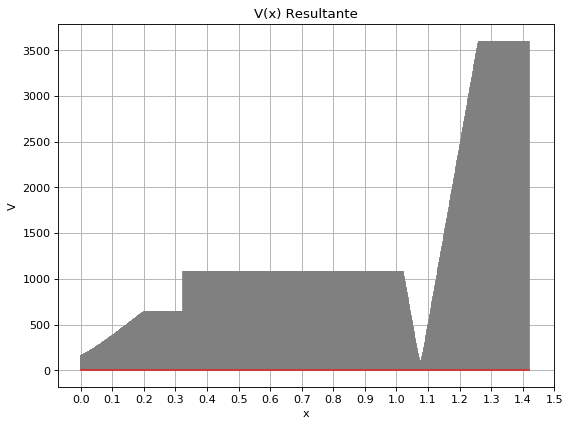

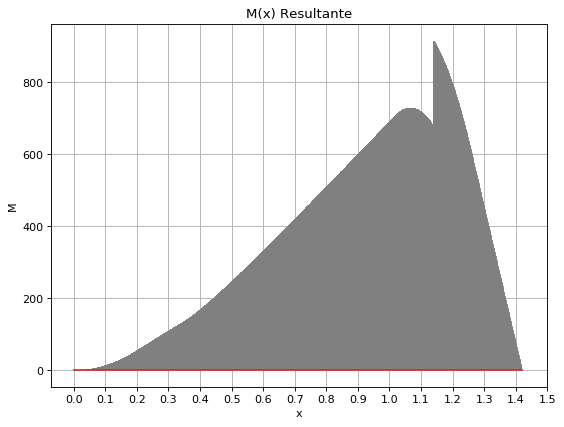

In [0]:
#@title V e M Resultantes

L_mm = np.arange(0, float(L)+0.001, 0.001)
L_cm = []
for i in range(len(L_mm)):
  L_cm.append(round(L_mm[i], 3))

somam_result = np.zeros((len(L_cm),1))
soma_result = np.zeros((len(L_cm),1))


for k in range(len(L_cm)):
  somam_result[k] =  math.sqrt((somam[k])**2+(somam1[k])**2)
  soma_result[k] = math.sqrt((soma[k])**2+(soma1[k])**2)



plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.stem(L_cm, soma_result, markerfmt=' ',linefmt='grey',use_line_collection = True)
plt.xticks(np.arange(0, float(L)+0.1, 0.1))
plt.ylabel('V')
plt.xlabel('x')
plt.grid('on')
plt.title('V(x) Resultante')
plt.savefig('V(x) Resultante')
plt.show()


plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.stem(L_cm, somam_result, markerfmt=' ',linefmt='grey',use_line_collection = True)
plt.xticks(np.arange(0, float(L)+0.1, 0.1))
plt.ylabel('M')
plt.xlabel('x')
plt.grid('on')
plt.title('M(x) Resultante')
plt.savefig('M(x) Resultante ')
plt.show()

In [0]:
#VALORES DAS SEÇÕES DO EIXO 
digite o numero de seções: 5
Digite a posição inicial da seção 1: 0
Digite a posição final da seção 1: 0.3
Digite a posição inicial da seção 2: 0.3
Digite a posição final da seção 2: 0.35
Digite a posição inicial da seção 3: 0.35
Digite a posição final da seção 3: 1.01
Digite a posição inicial da seção 4: 1.01
Digite a posição final da seção 4: 1.27
Digite a posição inicial da seção 5: 1.27
Digite a posição final da seção 5: 1.42

In [0]:
S_n = int(input('digite o numero de seções: '))
s_ini = []
s_fin = []
for i in range(S_n):
  s_ini.append(float(input("Digite a posição inicial da seção "+str(i+1)+": ")))
  s_fin.append(float(input("Digite a posição final da seção "+str(i+1)+": ")))

digite o numero de seções: 5
Digite a posição inicial da seção 1: 0
Digite a posição final da seção 1: 0.3
Digite a posição inicial da seção 2: 0.3
Digite a posição final da seção 2: 0.35
Digite a posição inicial da seção 3: 0.35
Digite a posição final da seção 3: 1.01
Digite a posição inicial da seção 4: 1.01
Digite a posição final da seção 4: 1.27
Digite a posição inicial da seção 5: 1.27
Digite a posição final da seção 5: 1.42


In [0]:
#@title Acha o máximo M e V em cada seção 
s1_v = []
s2_v = []
s3_v = []
s4_v = []
s5_v = []

s1_m = []
s2_m = []
s3_m = []
s4_m = []
s5_m = []

max_v = []
max_m = []


for i in range(len(L_cm)):
    if(L_cm[i]>=s_ini[0]) and (L_cm[i]<=s_fin[0]):
      s1_v.append(soma_result[i])
      s1_m.append(somam_result[i])
      if(L_cm[i]==s_fin[0]):
        max_v.append(float(max(s1_v)))
        max_m.append(float(max(s1_m)))

    if(L_cm[i]>s_ini[1]) and (L_cm[i]<=s_fin[1]):
      s2_v.append(soma_result[i])
      s2_m.append(somam_result[i])

      if(L_cm[i]==s_fin[1]):
        max_v.append(float(max(s2_v)))
        max_m.append(float(max(s2_m)))

    if(L_cm[i]>s_ini[2]) and (L_cm[i]<=s_fin[2]):
      s3_v.append(soma_result[i])
      s3_m.append(somam_result[i])

      if(L_cm[i]==s_fin[2]):
        max_v.append(float(max(s3_v)))
        max_m.append(float(max(s3_m)))

    if(L_cm[i]>s_ini[3]) and (L_cm[i]<=s_fin[3]):
      s4_v.append(soma_result[i])
      s4_m.append(somam_result[i])
      if(L_cm[i]==s_fin[3]):
        max_v.append(float(max(s4_v)))
        max_m.append(float(max(s4_m)))


    if(L_cm[i]>s_ini[4]) and (L_cm[i]<=s_fin[4]):
      s5_v.append(soma_result[i])
      s5_m.append(somam_result[i])

      if(L_cm[i]==s_fin[4]):
        max_v.append(float(max(s5_v)))
        max_m.append(float(max(s5_m)))


In [0]:
#@title TABELA DE MATERIAIS
Material = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
σesc = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
E1  = [140, 100, 160,80,180,120,240,200,220,60]
G = [50,36,60,30,68,44,90,73,78,22]
α = [18,17,23,16,19,25,21,22,24,20]
ρ = [ 5.5, 10.5,21.4,2.7,12.2,8.9,6.1,7.9,4.5,11.3]

table  = PrettyTable(['Material','σesc (MPa)', 'E (GPa)',' G (Gpa)','α µ/Cº','ρ g/C³'])

for i in range(0,10):
  table.add_row([Material[i],σesc[i],E1[i],G[i],α[i],ρ[i]])
print(table)

+----------+------------+---------+----------+--------+--------+
| Material | σesc (MPa) | E (GPa) |  G (Gpa) | α µ/Cº | ρ g/C³ |
+----------+------------+---------+----------+--------+--------+
|    1     |    100     |   140   |    50    |   18   |  5.5   |
|    2     |    200     |   100   |    36    |   17   |  10.5  |
|    3     |    300     |   160   |    60    |   23   |  21.4  |
|    4     |    400     |    80   |    30    |   16   |  2.7   |
|    5     |    500     |   180   |    68    |   19   |  12.2  |
|    6     |    600     |   120   |    44    |   25   |  8.9   |
|    7     |    700     |   240   |    90    |   21   |  6.1   |
|    8     |    800     |   200   |    73    |   22   |  7.9   |
|    9     |    900     |   220   |    78    |   24   |  4.5   |
|    10    |    1000    |    60   |    22    |   20   |  11.3  |
+----------+------------+---------+----------+--------+--------+


In [0]:
#Parametros digitados abaixo
Digite o numero do material desejado: 2
E = 100000000000
σesc =  200
Digite o valor da carga axial: 2984
Digite o valor do torque: 382.96
Digite o cs: 4

In [0]:
#@title Selecione o material desejado
ind = int(input('Digite o numero do material desejado: '))
E = E1[ind-1]*10**9
s = σesc[ind-1]
print('E =',E)
print('σesc = ',s)

P1 = float(input('Digite o valor da carga axial: '))
T1 = float(input('Digite o valor do torque: '))
cs = float(input('Digite o cs: '))

Digite o numero do material desejado: 2
E = 100000000000
σesc =  200
Digite o valor da carga axial: 2984
Digite o valor do torque: 382.96
Digite o cs: 4


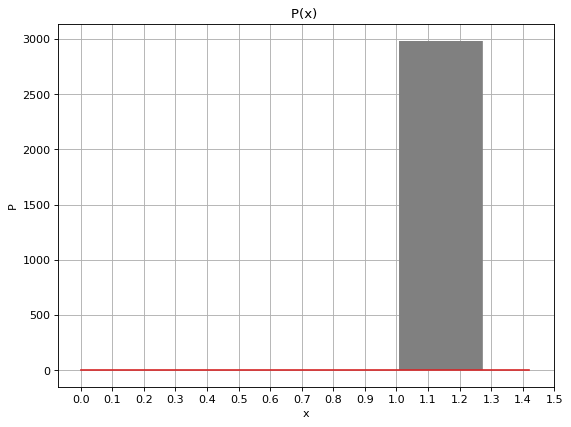

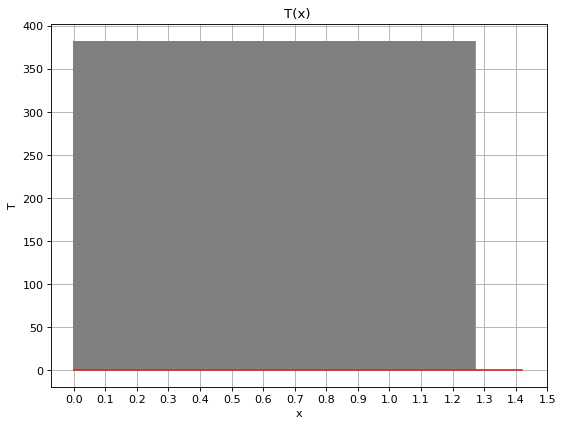

In [0]:
#@title P(x) e T(x)
P_graph = []
for i in range(len(L_cm)):
  if((L_cm[i]>1.010) and (L_cm[i]<=1.27)):
    P_graph.append(float(P1))
  else:
    P_graph.append(0)


plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.stem(L_cm, P_graph, markerfmt=' ',linefmt='grey',use_line_collection = True)
plt.xticks(np.arange(0, float(L)+0.1, 0.1))
plt.ylabel('P')
plt.xlabel('x')
plt.grid('on')
plt.title('P(x) ')
plt.show()

T_graph = []
for i in range(len(L_cm)):
  if(L_cm[i]<=1.27):
    T_graph.append(T1)
  else:
    T_graph.append(0)


plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.stem(L_cm, T_graph, markerfmt=' ',linefmt='grey',use_line_collection = True)
plt.xticks(np.arange(0, float(L)+0.1, 0.1))
plt.ylabel('T')
plt.xlabel('x')
plt.grid('on')
plt.title('T(x) ')
plt.show()


In [0]:
#@title Dimensiona as seções do eixo
c1=0
c2=0
c3=0
c4=0
Torq = [T1,T1,T1,T1,0]
P = [0,0,0,P1,0]
D = [0.001,0.001,0.001,0.001,0.001]
for i in range(5):
  while(c1!=1):
    A = [(math.pi*D[0]**2)/4,(math.pi*D[1]**2)/4,(math.pi*D[2]**2)/4,(math.pi*D[3]**2)/4,(math.pi*D[4]**2)/4]
    c = [D[0]/2,D[1]/2,D[2]/2,D[3]/2,D[4]/2]
    I = [(math.pi*D[0]**4)/64,(math.pi*D[1]**4)/64,(math.pi*D[2]**4)/64,(math.pi*D[3]**4)/64,(math.pi*D[4]**4)/64]
    J = [(math.pi*D[0]**4)/32,(math.pi*D[1]**4)/32,(math.pi*D[2]**4)/32,(math.pi*D[3]**4)/32,(math.pi*D[4]**4)/32]
    Q = [(D[0]**3)/12,(D[1]**3)/12,(D[2]**3)/12,(D[3]**3)/12,(D[4]**3)/12]
    σ_mais = [P[0]/A[0]+(max_m[0]*c[0])/I[0], P[1]/A[1]+(max_m[1]*c[1])/I[1], P[2]/A[2]+(max_m[2]*c[2])/I[2],P[3]/A[3]+(max_m[3]*c[3])/I[3],P[4]/A[4]+(max_m[4]*c[4])/I[4]]
    σ_menos = [P[0]/A[0]-(max_m[0]*c[0])/I[0], P[1]/A[1]-(max_m[1]*c[1])/I[1], P[2]/A[2]-(max_m[2]*c[2])/I[2],P[3]/A[3]-(max_m[3]*c[3])/I[3],P[4]/A[4]-(max_m[4]*c[4])/I[4]]
    τ_mais = [(max_v[0]*Q[0])/(I[0]*D[0])+(Torq[0]*c[0])/I[0],(max_v[1]*Q[1])/(I[1]*D[1])+(Torq[1]*c[1])/I[1],(max_v[2]*Q[2])/(I[2]*D[2])+(Torq[2]*c[2])/I[2],(max_v[3]*Q[3])/(I[3]*D[3])+(Torq[3]*c[3])/I[3],(max_v[4]*Q[4])/(I[4]*D[4])+(Torq[4]*c[4])/I[4]]
    τ_menos = [(max_v[0]*Q[0])/(I[0]*D[0])-(Torq[0]*c[0])/I[0],(max_v[1]*Q[1])/(I[1]*D[1])-(Torq[1]*c[1])/I[1],(max_v[2]*Q[2])/(I[2]*D[2])-(Torq[2]*c[2])/I[2],(max_v[3]*Q[3])/(I[3]*D[3])-(Torq[3]*c[3])/I[3],(max_v[4]*Q[4])/(I[4]*D[4])-(Torq[4]*c[4])/I[4]]
    σx = [max(abs(σ_mais[0]),abs(σ_menos[0])),max(abs(σ_mais[1]),abs(σ_menos[1])),max(abs(σ_mais[2]),abs(σ_menos[2])),max(abs(σ_mais[3]),abs(σ_menos[3])),max(abs(σ_mais[4]),abs(σ_menos[4]))]
    τx = [max(abs(τ_mais[0]),abs(τ_menos[0])),max(abs(τ_mais[1]),abs(τ_menos[1])),max(abs(τ_mais[2]),abs(τ_menos[2])),max(abs(τ_mais[3]),abs(τ_menos[3])),max(abs(τ_mais[4]),abs(τ_menos[4]))]
    σ1 = [σx[0]/2+math.sqrt((σx[0]/2)**2+τx[0]**2),σx[1]/2+math.sqrt((σx[1]/2)**2+τx[1]**2),σx[2]/2+math.sqrt((σx[2]/2)**2+τx[2]**2),σx[3]/2+math.sqrt((σx[3]/2)**2+τx[3]**2),σx[4]/2+math.sqrt((σx[4]/2)**2+τx[4]**2)]
    σ2 = [σx[0]/2-math.sqrt((σx[0]/2)**2+τx[0]**2),σx[1]/2-math.sqrt((σx[1]/2)**2+τx[1]**2),σx[2]/2-math.sqrt((σx[2]/2)**2+τx[2]**2),σx[3]/2-math.sqrt((σx[3]/2)**2+τx[3]**2),σx[4]/2-math.sqrt((σx[4]/2)**2+τx[4]**2)]
    σvm = [math.sqrt(σ1[0]**2-σ1[0]*σ2[0]+σ2[0]**2),math.sqrt(σ1[1]**2-σ1[1]*σ2[1]+σ2[1]**2),math.sqrt(σ1[2]**2-σ1[2]*σ2[2]+σ2[2]**2),math.sqrt(σ1[3]**2-σ1[3]*σ2[3]+σ2[3]**2),math.sqrt(σ1[4]**2-σ1[4]*σ2[4]+σ2[4]**2)]
    CS = [s*10**6/σvm[0],s*10**6/σvm[1],s*10**6/σvm[2],s*10**6/σvm[3],s*10**6/σvm[4]]

    
    D[i] = D[i]+0.00001
  
    
  
    if(σvm[i]*cs>=s*10**6-s*10**6*0.05) and (σvm[i]*cs<=s*10**6):
      c1=1
  c1=0

table  = PrettyTable(['Max M','Max V', 'D','P','T','A','c','I','J','Q','σ+','σ-','τ+','τ-','σx','τx','σ1','σ2','σvm','cs'])
print('CS = ', cs)
print('σ = ',s)
for i in range(len(max_m)):
  table.add_row([max_m[i],max_v[i], D[i],P[i],Torq[i],A[i],c[i],I[i],J[i],Q[i],σ_mais[i],σ_menos[i],τ_mais[i],τ_menos[i],σx[i],τx[i],σ1[i],σ2[i],σvm[i],CS[i]])
print(table)

CS =  4.0
σ =  200
+--------------------+--------------------+----------------------+--------+--------+-----------------------+----------------------+------------------------+------------------------+------------------------+--------------------+---------------------+--------------------+---------------------+--------------------+--------------------+--------------------+---------------------+--------------------+--------------------+
|       Max M        |       Max V        |          D           |   P    |   T    |           A           |          c           |           I            |           J            |           Q            |         σ+         |          σ-         |         τ+         |          τ-         |         σx         |         τx         |         σ1         |          σ2         |        σvm         |         cs         |
+--------------------+--------------------+----------------------+--------+--------+-----------------------+----------------------+----------

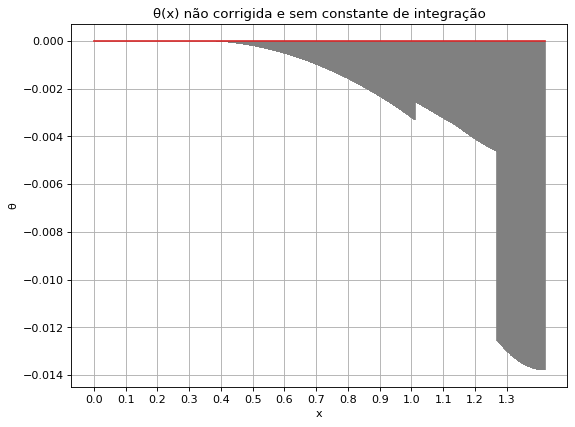

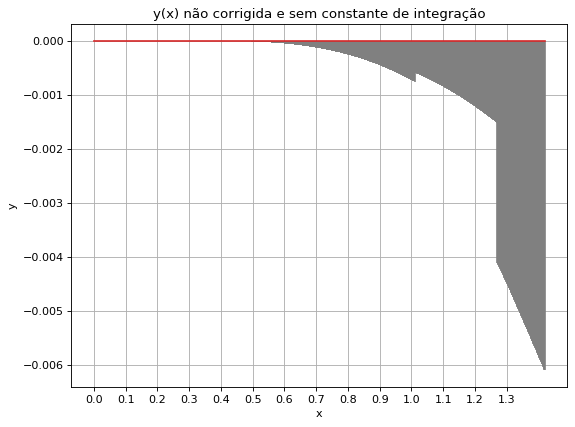

In [0]:
#@title PLANO XZ NÃO CORRIGIDO E SEM CONSTANTE DE INTEGRAÇÃO

somai_div = []

for i in range(len(L_cm)):  
    if(L_cm[i]>=s_ini[0]) and (L_cm[i]<=s_fin[0]):
      somai_div.append(somai[i]/(I[0]*E))
    
    if(L_cm[i]>s_ini[1]) and (L_cm[i]<=s_fin[1]):
      somai_div.append(somai[i]/(I[1]*E))

    if(L_cm[i]>s_ini[2]) and (L_cm[i]<=s_fin[2]):
      somai_div.append(somai[i]/(I[2]*E))
     
    if(L_cm[i]>s_ini[3]) and (L_cm[i]<=s_fin[3]):
      somai_div.append(somai[i]/(I[3]*E))

    if(L_cm[i]>s_ini[4]) and (L_cm[i]<=s_fin[4]):
      somai_div.append(somai[i]/(I[4]*E)) 



    
    
plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.stem(L_cm, somai_div, markerfmt=' ',linefmt='grey',use_line_collection = True)

#plt.scatter(x_mk,y_mk)
#for i in range(len(x_mk)):
  #label = int(y_mk[i])
  #plt.annotate(str(label),xy=(x_mk[i],y_mk[i]),color = "blue",size=12)
plt.ylabel('θ')
plt.xlabel('x')
plt.grid('on')
plt.xticks(np.arange(0, 1.4, 0.1))
plt.title('θ(x) não corrigida e sem constante de integração')
plt.savefig('test')
plt.show()


somad_div = []
for i in range(len(L_cm)):  
    if(L_cm[i]>=s_ini[0]) and (L_cm[i]<=s_fin[0]):
      somad_div.append(somad[i]/(I[0]*E))
    
    if(L_cm[i]>s_ini[1]) and (L_cm[i]<=s_fin[1]):
      somad_div.append(somad[i]/(I[1]*E))

    if(L_cm[i]>s_ini[2]) and (L_cm[i]<=s_fin[2]):
      somad_div.append(somad[i]/(I[2]*E))
     
    if(L_cm[i]>s_ini[3]) and (L_cm[i]<=s_fin[3]):
      somad_div.append(somad[i]/(I[3]*E))

    if(L_cm[i]>s_ini[4]) and (L_cm[i]<=s_fin[4]):
      somad_div.append(somad[i]/(I[4]*E))


      

plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.stem(L_cm, somad_div, markerfmt=' ',linefmt='grey',use_line_collection = True)
plt.ylabel('y')
plt.xlabel('x')
plt.grid('on')
plt.xticks(np.arange(0, 1.4, 0.1))
plt.title('y(x) não corrigida e sem constante de integração')
plt.show()



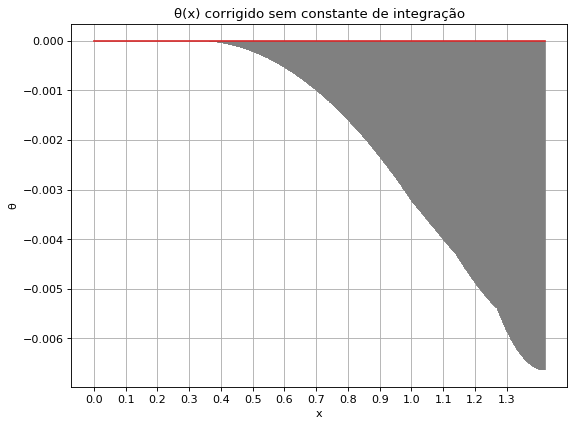

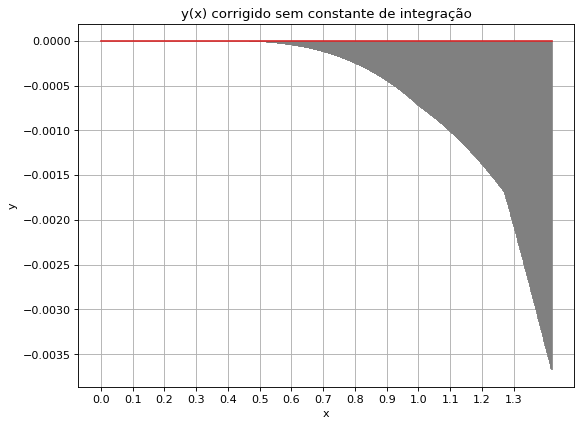

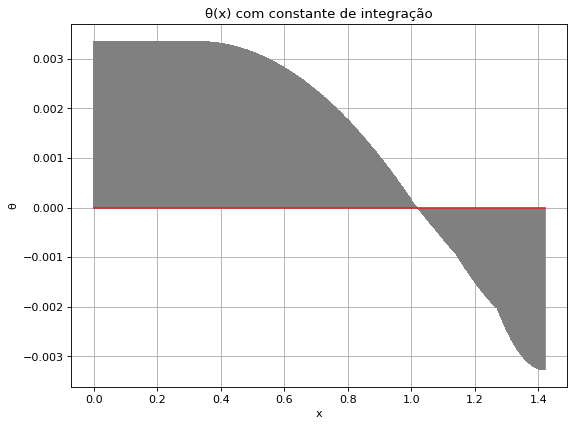

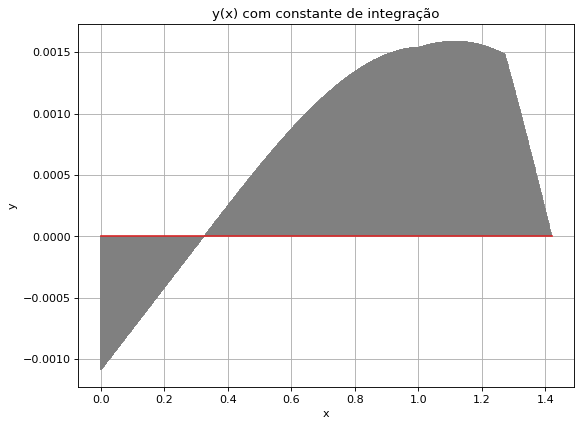

In [0]:
#@title PLANO XZ  CORRIGIDO E COM CONSTANTE DE INTEGRAÇÃO
ni = []

for i in range(len(L_cm)):  
    if(L_cm[i]>=s_ini[0]) and (L_cm[i]<=s_fin[0]):
      ni.append(somai_div[i])
      if(L_cm[i]==s_fin[0]):
         c1 = somai_div[i]
    if(L_cm[i]>s_ini[1]) and (L_cm[i]<=s_fin[1]):
      if(L_cm[i]==(s_ini[1]+0.001)):
         c_aux = somai_div[i]
      
      ni.append(somai_div[i]+c1)
      if(L_cm[i]==s_fin[1]):
         c2 = somai_div[i]+c1
    if(L_cm[i]>s_ini[2]) and (L_cm[i]<=s_fin[2]):
      if(L_cm[i]==(s_ini[2]+0.001)):
          c_aux=somai_div[i]
        
      ni.append(somai_div[i]+c2-c_aux)
      if(L_cm[i]==s_fin[2]):
         c3= somai_div[i]+c2-c_aux

    if(L_cm[i]>s_ini[3]) and (L_cm[i]<=s_fin[3]):
      if(L_cm[i]==(s_ini[3]+0.001)):
        c_aux = somai_div[i]
      ni.append(somai_div[i]+c3-c_aux)
      if(L_cm[i]==s_fin[3]):
        c4 = somai_div[i]+c3-c_aux

    if(L_cm[i]>s_ini[4]) and (L_cm[i]<=s_fin[4]):
      if(L_cm[i]==(s_ini[4]+0.001)):
        c_aux=somai_div[i]
      
      ni.append(somai_div[i]-c_aux+c4)


plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.stem(L_cm, ni, markerfmt=' ',linefmt='grey',use_line_collection = True)

plt.ylabel('θ')
plt.xlabel('x')
plt.grid('on')
plt.xticks(np.arange(0, 1.4, 0.1))
plt.title('θ(x) corrigido sem constante de integração')
plt.show()

ni1 = []

for i in range(len(L_cm)):  
    if(L_cm[i]>=s_ini[0]) and (L_cm[i]<=s_fin[0]):
      ni1.append(somad_div[i])
      if(L_cm[i]==s_fin[0]):
         c1 = somad_div[i]
    if(L_cm[i]>s_ini[1]) and (L_cm[i]<=s_fin[1]):
      if(L_cm[i]==(s_ini[1]+0.001)):
         c_aux = somad_div[i]
      
      ni1.append(somad_div[i]+c1-c_aux)
      if(L_cm[i]==s_fin[1]):
         c2 = somad_div[i]+c1-c_aux
    if(L_cm[i]>s_ini[2]) and (L_cm[i]<=s_fin[2]):
      if(L_cm[i]==(s_ini[2]+0.001)):
          c_aux=somad_div[i]
        
      ni1.append(somad_div[i]+c2-c_aux)
      if(L_cm[i]==s_fin[2]):
         c3= somad_div[i]+c2-c_aux

    if(L_cm[i]>s_ini[3]) and (L_cm[i]<=s_fin[3]):
      if(L_cm[i]==(s_ini[3]+0.001)):
        c_aux = somad_div[i]
      ni1.append(somad_div[i]+c3-c_aux)
      if(L_cm[i]==s_fin[3]):
        c4 = somad_div[i]+c3-c_aux

    if(L_cm[i]>s_ini[4]) and (L_cm[i]<=s_fin[4]):
      if(L_cm[i]==(s_ini[4]+0.001)):
        c_aux=somad_div[i]
      
      ni1.append(somad_div[i]-c_aux+c4)

plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.stem(L_cm, ni1, markerfmt=' ',linefmt='grey',use_line_collection = True)

plt.ylabel('y')
plt.xlabel('x')
plt.grid('on')
plt.xticks(np.arange(0, 1.4, 0.1))
plt.title('y(x) corrigido sem constante de integração')
plt.show()


for i in range(len(L_cm)):
  if(L_cm[i]==float(p_apoio[0])):
    v0 = ni1[i]

  if(L_cm[i]==float(p_apoio[1])):
    
    v1 = ni1[i]

A1 = np.array([[p_apoio[0],1],[p_apoio[1],1]],dtype='float')
B1 = np.array([-v0,-v1])
A_inv = np.linalg.inv(A1)
Z1 = np.dot(A_inv,B1)

somai_cons  = []
for i in range(len(L_cm)):
  somai_cons.append(ni[i]+Z1[0])



plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.stem(L_cm, somai_cons, markerfmt=' ',linefmt='grey',use_line_collection = True)

#plt.scatter(x_mk,y_mk)
#for i in range(len(x_mk)):
  #label = int(y_mk[i])
  #plt.annotate(str(label),xy=(x_mk[i],y_mk[i]),color = "blue",size=12)
plt.ylabel('θ')
plt.xlabel('x')
plt.grid('on')
plt.title('θ(x) com constante de integração')
plt.savefig('test')
plt.show()

somad_cons  = []
for i in range(len(L_cm)):
  somad_cons.append(ni1[i]+Z1[0]*L_cm[i]+Z1[1])

plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.stem(L_cm, somad_cons, markerfmt=' ',linefmt='grey',use_line_collection = True)

#plt.scatter(x_mk,y_mk)
#for i in range(len(x_mk)):
  #label = int(y_mk[i])
  #plt.annotate(str(label),xy=(x_mk[i],y_mk[i]),color = "blue",size=12)
plt.ylabel('y')
plt.xlabel('x')
plt.grid('on')
plt.title('y(x) com constante de integração')
plt.savefig('test')
plt.show()




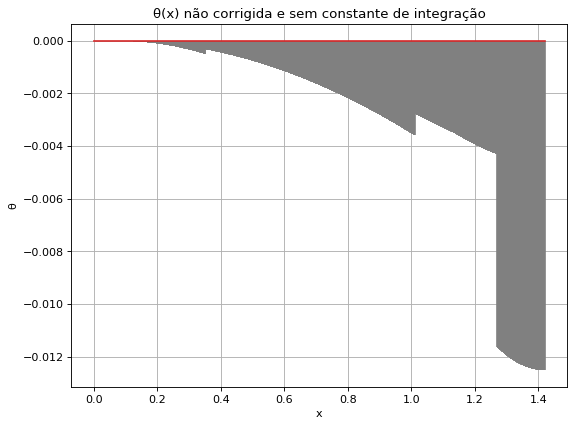

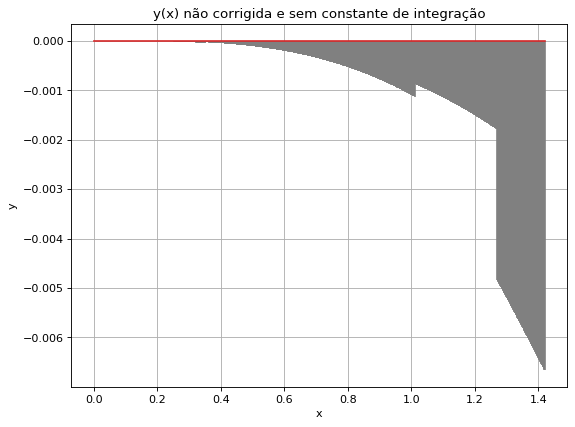

In [0]:
#@title PLANO XY NÃO CORRIGIDO E SEM CONSTANTE DE INTEGRAÇÃO 



somai1_div = []
for i in range(len(L_cm)):  
    if(L_cm[i]>=s_ini[0]) and (L_cm[i]<=s_fin[0]):
      somai1_div.append(somai1[i]/(I[0]*E))
    
    if(L_cm[i]>s_ini[1]) and (L_cm[i]<=s_fin[1]):
      somai1_div.append(somai1[i]/(I[1]*E))

    if(L_cm[i]>s_ini[2]) and (L_cm[i]<=s_fin[2]):
      somai1_div.append(somai1[i]/(I[2]*E))
     
    if(L_cm[i]>s_ini[3]) and (L_cm[i]<=s_fin[3]):
      somai1_div.append(somai1[i]/(I[3]*E))

    if(L_cm[i]>s_ini[4]) and (L_cm[i]<=s_fin[4]):
      somai1_div.append(somai1[i]/(I[4]*E))


plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.stem(L_cm, somai1_div, markerfmt=' ',linefmt='grey',use_line_collection = True)


plt.ylabel('θ')
plt.xlabel('x')
plt.grid('on')
plt.title('θ(x) não corrigida e sem constante de integração')
plt.savefig('test')
plt.show()

somad1_div = []

for i in range(len(L_cm)):  
    if(L_cm[i]>=s_ini[0]) and (L_cm[i]<=s_fin[0]):
      somad1_div.append(somad1[i]/(I[0]*E))
    
    if(L_cm[i]>s_ini[1]) and (L_cm[i]<=s_fin[1]):
      somad1_div.append(somad1[i]/(I[1]*E))

    if(L_cm[i]>s_ini[2]) and (L_cm[i]<=s_fin[2]):
      somad1_div.append(somad1[i]/(I[2]*E))
     
    if(L_cm[i]>s_ini[3]) and (L_cm[i]<=s_fin[3]):
      somad1_div.append(somad1[i]/(I[3]*E))

    if(L_cm[i]>s_ini[4]) and (L_cm[i]<=s_fin[4]):
      somad1_div.append(somad1[i]/(I[4]*E))



plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.stem(L_cm, somad1_div, markerfmt=' ',linefmt='grey',use_line_collection = True)
plt.ylabel('y')
plt.xlabel('x')
plt.grid('on')
plt.title('y(x) não corrigida e sem constante de integração')
plt.show()


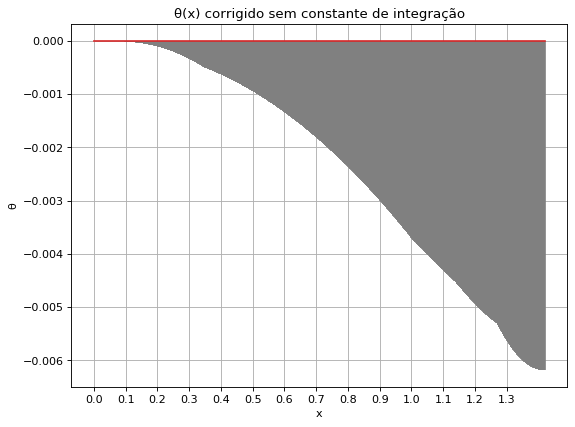

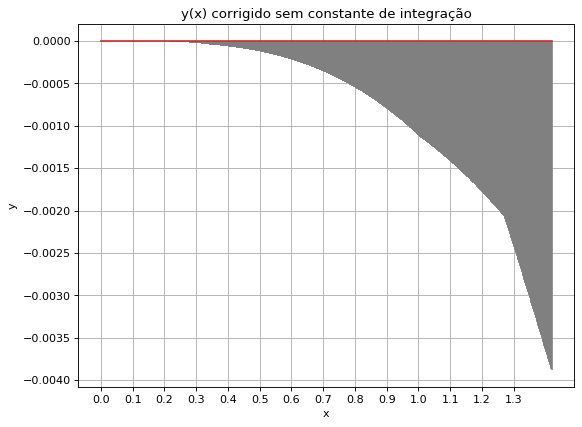

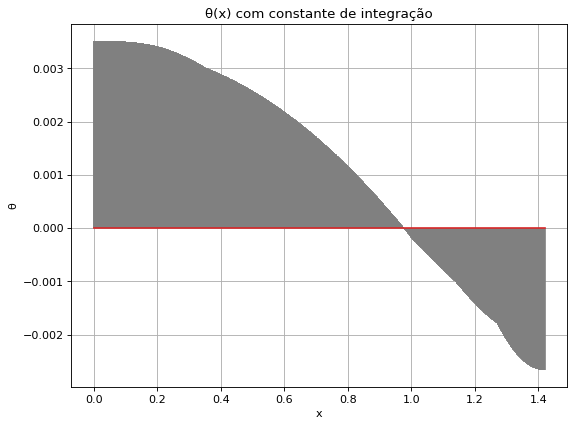

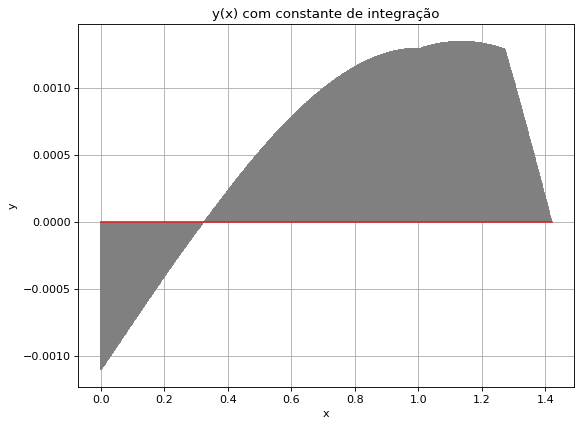

In [0]:
#@title PLANO XY CORRIGIDO E COM CONSTANTE DE INTEGRAÇÃO
oi = []

for i in range(len(L_cm)):  
    if(L_cm[i]>=s_ini[0]) and (L_cm[i]<=s_fin[0]):
      oi.append(somai1_div[i])
      if(L_cm[i]==s_fin[0]):
         c1 = somai1_div[i]
    if(L_cm[i]>s_ini[1]) and (L_cm[i]<=s_fin[1]):
      if(L_cm[i]==(s_ini[1]+0.001)):
         c_aux = somai1_div[i]
      
      oi.append(somai1_div[i]+c1-c_aux)
      if(L_cm[i]==s_fin[1]):
         c2 = somai1_div[i]+c1-c_aux
    if(L_cm[i]>s_ini[2]) and (L_cm[i]<=s_fin[2]):
      if(L_cm[i]==(s_ini[2]+0.001)):
          c_aux=somai1_div[i]
        
      oi.append(somai1_div[i]+c2-c_aux)
      if(L_cm[i]==s_fin[2]):
         c3= somai1_div[i]+c2-c_aux

    if(L_cm[i]>s_ini[3]) and (L_cm[i]<=s_fin[3]):
      if(L_cm[i]==(s_ini[3]+0.001)):
        c_aux = somai1_div[i]
      oi.append(somai1_div[i]+c3-c_aux)
      if(L_cm[i]==s_fin[3]):
        c4 = somai1_div[i]+c3-c_aux

    if(L_cm[i]>s_ini[4]) and (L_cm[i]<=s_fin[4]):
      if(L_cm[i]==(s_ini[4]+0.001)):
        c_aux=somai1_div[i]
      
      oi.append(somai1_div[i]-c_aux+c4)




plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.stem(L_cm, oi, markerfmt=' ',linefmt='grey',use_line_collection = True)

#plt.scatter(x_mk,y_mk)
#for i in range(len(x_mk)):
  #label = int(y_mk[i])
  #plt.annotate(str(label),xy=(x_mk[i],y_mk[i]),color = "blue",size=12)
plt.ylabel('θ')
plt.xlabel('x')
plt.grid('on')
plt.xticks(np.arange(0, 1.4, 0.1))
plt.title('θ(x) corrigido sem constante de integração')
plt.show()


oi1 = []

for i in range(len(L_cm)):  
    if(L_cm[i]>=s_ini[0]) and (L_cm[i]<=s_fin[0]):
      oi1.append(somad1_div[i])
      if(L_cm[i]==s_fin[0]):
         c1 = somad1_div[i]
    if(L_cm[i]>s_ini[1]) and (L_cm[i]<=s_fin[1]):
      if(L_cm[i]==(s_ini[1]+0.001)):
         c_aux = somad1_div[i]
      
      oi1.append(somad1_div[i]+c1-c_aux)
      if(L_cm[i]==s_fin[1]):
         c2 = somad1_div[i]+c1-c_aux
    if(L_cm[i]>s_ini[2]) and (L_cm[i]<=s_fin[2]):
      if(L_cm[i]==(s_ini[2]+0.001)):
          c_aux=somad1_div[i]
        
      oi1.append(somad1_div[i]+c2-c_aux)
      if(L_cm[i]==s_fin[2]):
         c3= somad1_div[i]+c2-c_aux

    if(L_cm[i]>s_ini[3]) and (L_cm[i]<=s_fin[3]):
      if(L_cm[i]==(s_ini[3]+0.001)):
        c_aux = somad1_div[i]
      oi1.append(somad1_div[i]+c3-c_aux)
      if(L_cm[i]==s_fin[3]):
        c4 = somad1_div[i]+c3-c_aux

    if(L_cm[i]>s_ini[4]) and (L_cm[i]<=s_fin[4]):
      if(L_cm[i]==(s_ini[4]+0.001)):
        c_aux=somad1_div[i]
      
      oi1.append(somad1_div[i]-c_aux+c4)

plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.stem(L_cm, oi1, markerfmt=' ',linefmt='grey',use_line_collection = True)

plt.ylabel('y')
plt.xlabel('x')
plt.grid('on')
plt.xticks(np.arange(0, 1.4, 0.1))
plt.title('y(x) corrigido sem constante de integração')
plt.show()


for i in range(len(L_cm)):
  if(L_cm[i]==float(p_apoio[0])):
    v0 = oi1[i]

  if(L_cm[i]==float(p_apoio[1])):
    
    v1 = oi1[i]

A1 = np.array([[p_apoio[0],1],[p_apoio[1],1]],dtype='float')
B1 = np.array([-v0,-v1])
A_inv = np.linalg.inv(A1)
Z1 = np.dot(A_inv,B1)

somai_cons1  = []
for i in range(len(L_cm)):
  somai_cons1.append(oi[i]+Z1[0])



plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.stem(L_cm, somai_cons1, markerfmt=' ',linefmt='grey',use_line_collection = True)

#plt.scatter(x_mk,y_mk)
#for i in range(len(x_mk)):
  #label = int(y_mk[i])
  #plt.annotate(str(label),xy=(x_mk[i],y_mk[i]),color = "blue",size=12)
plt.ylabel('θ')
plt.xlabel('x')
plt.grid('on')
plt.title('θ(x) com constante de integração')
plt.savefig('test')
plt.show()

somad_cons1  = []
for i in range(len(L_cm)):
  somad_cons1.append(oi1[i]+Z1[0]*L_cm[i]+Z1[1])

plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.stem(L_cm, somad_cons1, markerfmt=' ',linefmt='grey',use_line_collection = True)

#plt.scatter(x_mk,y_mk)
#for i in range(len(x_mk)):
  #label = int(y_mk[i])
  #plt.annotate(str(label),xy=(x_mk[i],y_mk[i]),color = "blue",size=12)
plt.ylabel('y')
plt.xlabel('x')
plt.grid('on')
plt.title('y(x) com constante de integração')
plt.savefig('test')
plt.show()

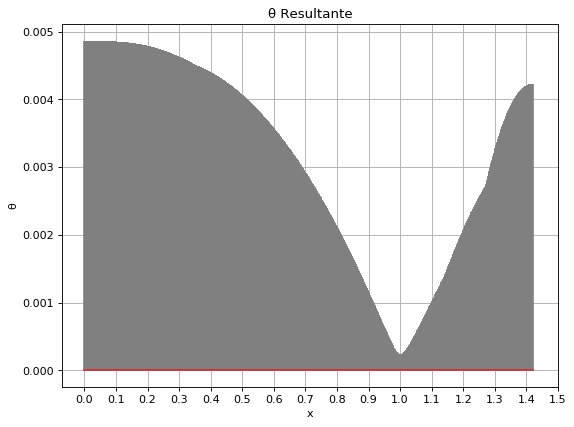

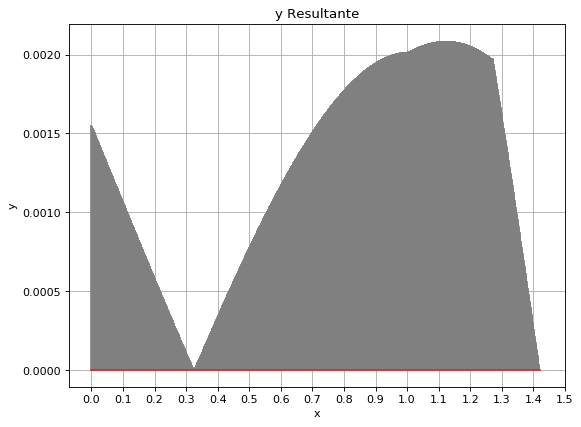

In [0]:
#@title θ e Y Resultantes

L_mm = np.arange(0, float(L)+0.001, 0.001)
L_cm = []
for i in range(len(L_mm)):
  L_cm.append(round(L_mm[i], 3))

somad_result = np.zeros((len(L_cm),1))
somai_result = np.zeros((len(L_cm),1))


for k in range(len(L_cm)):
  somad_result[k] =  math.sqrt((somad_cons1[k])**2+(somad_cons[k])**2)
  somai_result[k] = math.sqrt((somai_cons1[k])**2+(somai_cons[k])**2)



plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.stem(L_cm, somai_result, markerfmt=' ',linefmt='grey',use_line_collection = True)
plt.xticks(np.arange(0, float(L)+0.1, 0.1))
plt.ylabel('θ')
plt.xlabel('x')
plt.grid('on')
plt.title('θ Resultante')
plt.show()


plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.stem(L_cm, somad_result, markerfmt=' ',linefmt='grey',use_line_collection = True)
plt.xticks(np.arange(0, float(L)+0.1, 0.1))
plt.ylabel('y')
plt.xlabel('x')
plt.grid('on')
plt.title('y Resultante')
plt.show()

In [0]:
#@title Deflexão máxima e inclinação nos mancais
print('A máxima deflexão é:', float(max(somad_result)))
print('A deflexão máxima se localiza em: ',L_cm[np.argmax(somad_result)])

for i in range(len(L_cm)):
  if(L_cm[i]==float(p_apoio[0])):
    print('A deflexão em RA é:',float(somai_result[i]))
  if(L_cm[i]==float(p_apoio[1])):
    print('A deflexão em RB é:',float(somai_result[i]))  


A máxima deflexão é: 0.002086862636318432
A deflexão máxima se localiza em:  1.124
A deflexão em RA é: 0.004573261096131312
A deflexão em RB é: 0.004231093830938746
